### ------------------------------------------------------------------------
### Aula Inteligência Artificial
### Modelos Preditivos de avaliação
### Algoritmos:  Árvore de Decisão
### -------------------------------------------------------------------------

###  Métricas de avaliação:

#### Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

#### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.


<div>
<img src="matrizConfusao-600x381.png" width="400"/>
</div>

#### Outras medidas

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

#### Base de dados Iris

In [1]:
#Base Iris
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
#Base Iris
# carrega a base de dados iris
dados = pandas.read_csv('bases/iris.csv')
dados

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 5.15
|   |   |   |--- feature_3 <= 1.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- feature_3 <= 1.75
|   |   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- feature_3 >  1.75
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.85
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  5.15
|   |   |   |--- class: Iri

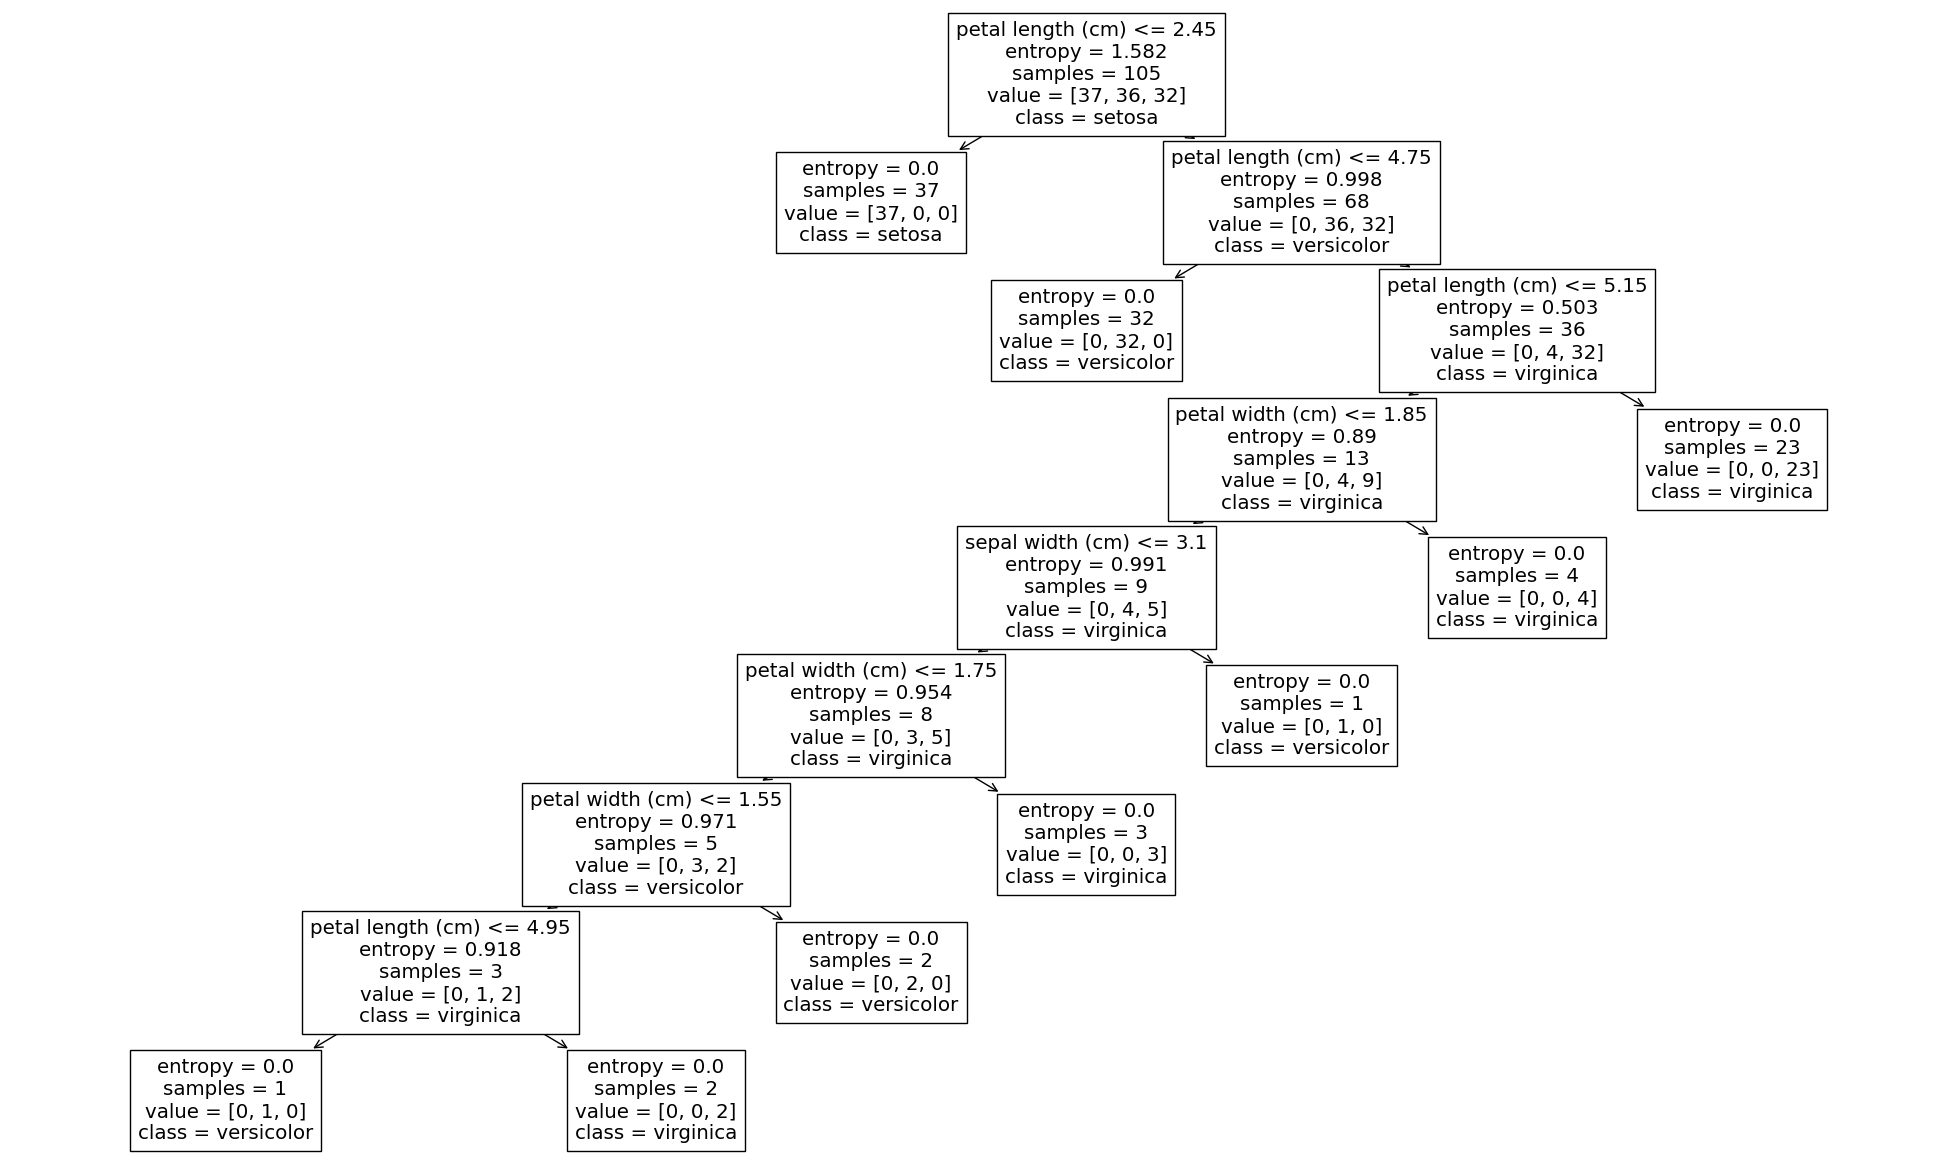

In [3]:
colunas = dados.columns.drop('Name')

X = dados[colunas].values
y = dados['Name'].values
# le = LabelEncoder()
# y = le.fit_transform(dados['Name'])

X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                            y, train_size=0.7, test_size=0.3)

clf = DecisionTreeClassifier(criterion="entropy")
# treina o classificador
clf.fit(X_treino, y_treino)

y_pred = clf.predict(X_teste)

#Print Text Representation
#Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. You can check details about export_text in the sklearn
text_representation = tree.export_text(clf)
print(text_representation)

#Cria uam lista com features e class names
fn=['sepal length (cm)','sepal width (cm)',
    'petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

fig = plt.figure(figsize=(25,15))
tree.plot_tree(clf, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=False)
# tree.plot_tree(clf, class_names=True)

plt.show()                   


In [4]:
X.shape, y.shape, X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((150, 4), (150,), (105, 4), (105,), (45, 4), (45,))

### Importando métricas do Sklearn

In [5]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

### Acuracidade

In [7]:
accuracy_score(y_teste,y_pred)

0.9777777777777777

### Matriz Confusão

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

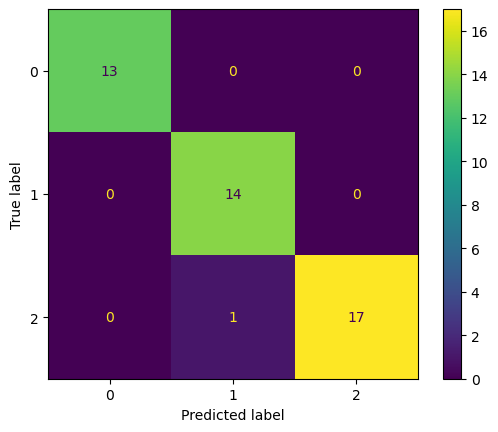

In [11]:
cm = confusion_matrix(y_teste, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [12]:
dados['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

## Normalização de atributos numéricos

A normalização por reescala define, através de um valor mínimo e um valor máximo, um novo intervalo onde os valores de um atributo estarão contidos. Tipicamente, tal intervalo é definido como [0, 1]. Portanto, para este caso, a normalização por reescala de um atributo $j$ de um objeto $x_i$ pode ser calculada como:

$$ x_{ij} = \frac{x_{ij} - min_j}{max_j - min_j} $$

sendo min_j e max_j , nessa ordem, os valores mínimo e máximo do atributo $j$ para o conjunto de dados considerado.

Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de posição e de espalhamento/variação. 
Essas medidas irão consistir na média e no desvio-padrão. Neste caso, o valor normalizado de um atributo $j$
em um objeto $i$ é dado por:

$$ x_{ij} = \frac{x_{ij} - \bar{x}_j}{\sigma_j} $$

In [ ]:
#Exemplo com KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)

# treina o classificador
KNN.fit(X_treino, y_treino)
KNN_pred = clf_KNN.predict(X_teste)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [15]:
clf = DecisionTreeClassifier(criterion="entropy")
# treina o classificador
clf.fit(X_treino, y_treino)

y_pred = clf.predict(X_teste)

In [16]:
accuracy_score(y_teste,y_pred)

0.9777777777777777